# Анализ лотереи "Удача в придачу"

Площадка для работы с данными лотереи. Здесь собираются сами данные и результаты их анализа. 

## Источники данных
1. Основной источник данных - https://igra.evroopt.by/archive/winners/
2. Архив лотереи с регистрационными документами отдельных туров - https://igra.evroopt.by/archive/


## Правила и особенности игры

Рекламная игра "Удача в придачу" проводится отдельными турами, каждый тур длится 14 дней. Туры с 1 по 4 объединены в 1 тур.

В каждом туре есть список игровых товаров. Для участия в игре человек должен приобрести в магазине сети "Евроопт" игровой товар, причем общая сумма покупки должна превышать 10 рублей. В таком случае игрок получает игровой код и может принять участие в лотерее. За каждые последующие 10 рублей в чеке можно получить дополнительный игровой код вне зависимости от того, куплен еще один игровой товар или нет.

После покупки нужно зарегистрироваться на сайте игры и ввести свои персональные данные.


## Персональные данные

Участие в игре предполагает передачу персональных данных игрока организатору лотереи:

- Обязательные данные
    - ФИО
    - Населенный пункт
    - Улица (при наличии)
    - Дом
    - Корпус дома (при наличии)
    - Номер квартиры (при наличии)
    - Номер мобильного телефона в международном формате


- Желательные данные
    - Область
    - Район
    - Адрес электронной почты

Соглашение об обработке и хранении персональных данных игроков приводится в регистрационных документах каждого тура.


## Охват игры

Определить точное количество участников игры по номеру игрового кода не удастся, поскольку один человек может получить несколько игровых кодов. Согласно [пресс-релизу](https://igra.evroopt.by/news/complete27/), за первый год работы лотереи в ней приняли участие около 1.2 миллиона человек.

Можно предположить, что на окончание 34 тура реальное количество участников лотереи составляет около 1,5 миллиона человек. Лотерея уже охватывает 4 958 населенных пунктов.


## Данные: 

1. Календарь туров игры - data/calendar.csv
2. Собранные данные по победителям туров - data/evroopt_udacha.csv
3. Оригиналы регистрационных документов отдельных туров игры - docs/*


## Структура основного набора данных

В основном наборе данных *data/evroopt_udacha.csv* указаны следующие переменные:

- **tour**, номер тура игры
- **game_code**, выигравший игровой код
- **fio**, ФИО победителя
- **place**, место жительства
- **lat**, широта
- **lon**, долгота (координаты нуждаются в проверке)
- **sex**, пол победителя (определен для около 99,5% победителей)
- **evroopt**, является или нет сотрудником сети "Евроопт"
- **prize**, приз
- **n_prize**, номер приза

## Рабочие вопросы и гипотезы

1. Есть ли закономерности в значениях выигравших кодов (пременная game_code)?
2. Что означают повторы значений переменной game_code? Например, среди выигравших в 1-32 турах 263 170 игровых кодов только 247 446 или 94% уникальных кода.

**Гипотеза**. Широкая география выигрышей (4 958 населенных пунктов) может быть не случайна, а срежиссирована маркетологами игры с целью расширения клиентуры торговой сети.

Варианты проверки гипотезы:

1. В каждом туре есть некое постоянное число новых мест проживания победителей
2. В каждом туре есть квота на города-поселки с определенным числом жителей
3. География лотереи как-то совпадает с географией самой сети "Евроопт" и ее возможностей по автоперевозкам


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/evroopt_udacha.csv")

In [9]:
# Смотрим самых везучих победителей по количеству выигрышей
data["fio"].value_counts().head(10)

Рачковский Владимир Витольдович    31
Морозова Татьяна Михайловна        29
Денисик Алла Михайловна            29
Корнеев Павел Борисович            29
Занько Сергей Алексеевич           27
Савостьянов Леонид Леонидович      25
Шайковская Екатерина Сергеевна     24
Рыбалко Александр Валентинович     24
Шестакович Наталья Николаевна      24
Климович Игорь Николаевич          23
Name: fio, dtype: int64

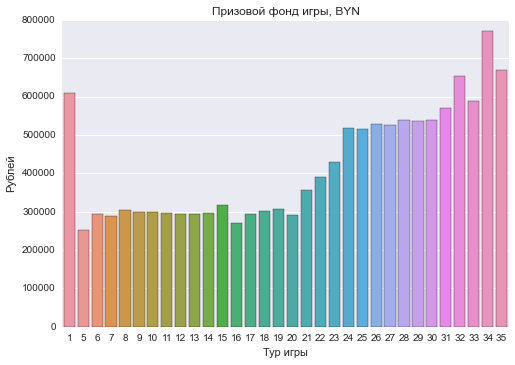

In [18]:
# Смотрим динамику призового фонда игры
calendar = pd.read_csv("data/calendar.csv")
sns.barplot(x = "tour", y = "prize_fund", data = calendar)\
    .set(xlabel = u"Тур игры", ylabel = u'Рублей', title = u"Призовой фонд игры, BYN")

Первое, что бросается в глаза - это динамика количества призов. С 24 тура количество призов и победителей резко выросло, а с 30 тура так же резко сократилось.

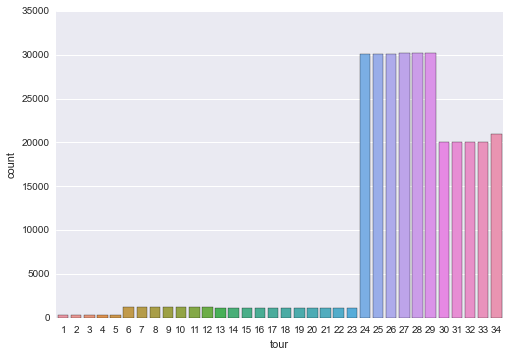

In [19]:
sns.countplot(data["tour"])

Смотрим, где чаще всего выигрывают

In [20]:
places = data["place"].value_counts(normalize = True)
places.head(10)

г. Минск         0.277439
г. Гомель        0.056345
г. Витебск       0.045241
г. Гродно        0.039114
г. Могилев       0.031547
г. Брест         0.029216
г. Бобруйск      0.023858
г. Лида          0.021593
г. Новополоцк    0.016669
г. Жлобин        0.016548
Name: place, dtype: float64

28% выигрышей приходится на Минск. За столицей с большим отрывом идут другие города - там находится не более 6% победителей.